# Плотное векторное представление слов для определения тональности текста отзывов на фильмы из IMDb (Internet Movie Database)

Учебный курс "[Нейросети для анализа текстов](https://www.asozykin.ru/courses/nnpython)".

In [ ]:
from tensorflow.keras.datasets import imdb
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten, Dropout, Conv1D, MaxPooling1D, BatchNormalization, GlobalMaxPooling1D, GRU
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.regularizers import l2
from tensorflow.keras import utils
from tensorflow.keras.preprocessing.sequence import pad_sequences
# работа с обратной связью от обучающейся нейронной сети
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint, ReduceLROnPlateau
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/dl-urfu-imdb/train.npy
/kaggle/input/dl-urfu-imdb/train_label.npy
/kaggle/input/dl-urfu-imdb/sample_supmission.csv
/kaggle/input/dl-urfu-imdb/test.npy


Загружаем данные

In [ ]:
KAGGLE_PATH = '/kaggle/input/dl-urfu-imdb/'
x_train = np.load(KAGGLE_PATH + 'train.npy', allow_pickle=True)
y_train = np.load(KAGGLE_PATH + 'train_label.npy', allow_pickle=True)
x_test = np.load(KAGGLE_PATH + 'test.npy', allow_pickle=True)
x_train.shape, y_train.shape, x_test.shape,

((46000,), (46000,), (4000,))

## Подготовка данных для обучения

In [ ]:
max_words = 10_000
maxlen = 500
x_train = pad_sequences(x_train, maxlen=maxlen, padding='post')
x_test = pad_sequences(x_test, maxlen=maxlen, padding='post')

## Создание нейронной сети

In [ ]:
model = Sequential()
model.add(Embedding(max_words, 5, input_length=maxlen))
model.add(Dropout(0.8))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

In [ ]:
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

## Обучаем нейронную сеть

In [ ]:
history = model.fit(x_train,
                    y_train,
                    epochs=30,
                    batch_size=250,
                    validation_split=0.05)

Epoch 1/30
175/175 [==============================] - 4s 16ms/step - loss: 0.6940 - accuracy: 0.5021 - val_loss: 0.6872 - val_accuracy: 0.5943
Epoch 2/30
175/175 [==============================] - 3s 15ms/step - loss: 0.6686 - accuracy: 0.6202 - val_loss: 0.5586 - val_accuracy: 0.7809
Epoch 3/30
175/175 [==============================] - 2s 13ms/step - loss: 0.5191 - accuracy: 0.7772 - val_loss: 0.4068 - val_accuracy: 0.8557
Epoch 4/30
175/175 [==============================] - 2s 13ms/step - loss: 0.4131 - accuracy: 0.8255 - val_loss: 0.3413 - val_accuracy: 0.8757
Epoch 5/30
175/175 [==============================] - 2s 13ms/step - loss: 0.3582 - accuracy: 0.8526 - val_loss: 0.3113 - val_accuracy: 0.8804
Epoch 6/30
175/175 [==============================] - 2s 13ms/step - loss: 0.3349 - accuracy: 0.8615 - val_loss: 0.2913 - val_accuracy: 0.8874
Epoch 7/30
175/175 [==============================] - 2s 14ms/step - loss: 0.3134 - accuracy: 0.8732 - val_loss: 0.2794 - val_accuracy: 0.8904

Epoch 1/10
207/207 [==============================] - 46s 214ms/step - loss: 0.5458 - accuracy: 0.6712 - val_loss: 0.2948 - val_accuracy: 0.8709
Epoch 2/10
207/207 [==============================] - 44s 214ms/step - loss: 0.2418 - accuracy: 0.9031 - val_loss: 0.2951 - val_accuracy: 0.8772

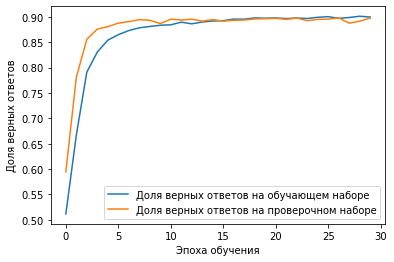

In [ ]:
plt.plot(history.history['accuracy'],
         label='Доля верных ответов на обучающем наборе')
plt.plot(history.history['val_accuracy'],
         label='Доля верных ответов на проверочном наборе')
plt.xlabel('Эпоха обучения')
plt.ylabel('Доля верных ответов')
plt.legend()
plt.show()

## Готовим данные для LeaderBoard

In [ ]:
sample_submission = pd.read_csv(KAGGLE_PATH + 'sample_supmission.csv', index_col='id')
sample_submission.label = model.predict_classes(x_test)
sample_submission.to_csv("sample_submission.csv")

/opt/conda/lib/python3.7/site-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


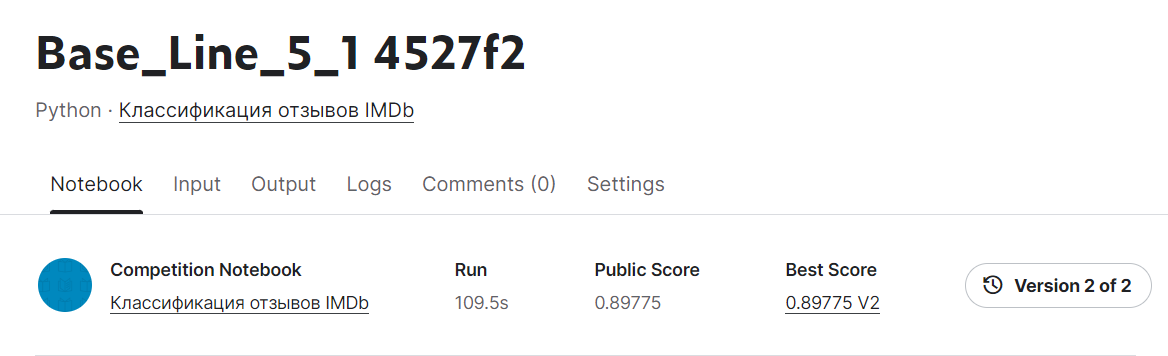

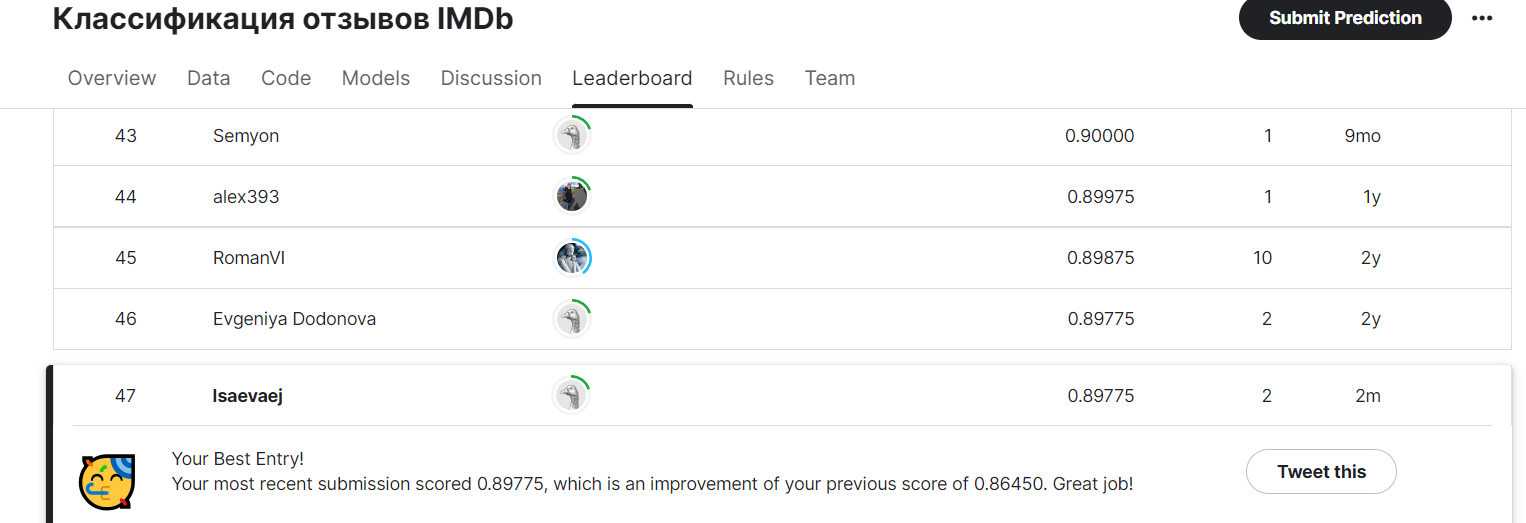